<a href="https://colab.research.google.com/github/vijaygr8/Credit-Risk-Analysis/blob/main/Credit_Risk_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1: Problem Statement

Task-2: Data Exploration and Validation

Task-3: Data Cleaning

Task-4: Model Building Models(Logistic Regregression, Decision trees & Random Forest)

Task-5: Model presentation


# Credit Risk Model:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Bank Credit risk analysis of customers on the basis of following available parametrs:
'SeriousDlqin2yrs', 'monthly_utilization', 'age' 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate' 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
'NumberOfDependents'**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/vijaygr8/Credit-Risk-Analysis/8f01cbc89671d135c76f0fdaa8e98493d554c70c/Dataset",sep=',',engine='python')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

Number of dependents can not be float.

In [4]:
df.shape

(150000, 12)

In [5]:
df.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [6]:
df.head()

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
df.isnull().sum()

Sr_No                                       0
SeriousDlqin2yrs                            0
monthly_utilization                         0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
df.isnull().sum()/len(df)*100

Sr_No                                    0.000000
SeriousDlqin2yrs                         0.000000
monthly_utilization                      0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

# Categorical variables exploration

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64
null= 0


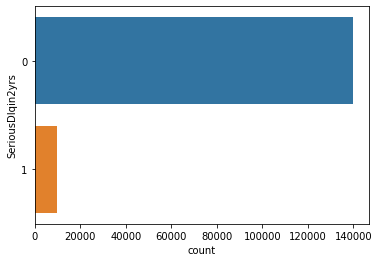

In [9]:
print(df['SeriousDlqin2yrs'].value_counts())
sns.countplot(y="SeriousDlqin2yrs",  data=df)
print('null=',df['SeriousDlqin2yrs'].isnull().sum())
#No issue

49     3837
48     3806
50     3753
47     3719
63     3719
       ... 
102       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64
null= 0
Min= 0
Max= 109


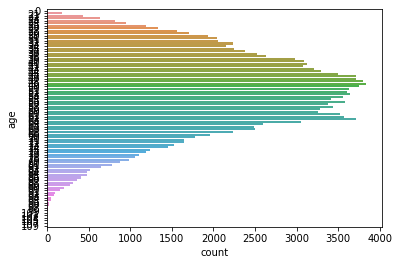

In [10]:
print(df['age'].value_counts())
sns.countplot(y="age",  data=df)
print('null=',df['age'].isnull().sum())
print("Min=",df['age'].min())
print("Max=",df['age'].max())
# there is an issue where below 18 and aove 100+ age but it depends upon the business model.

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64
null= 0


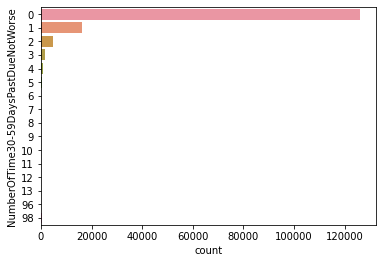

In [11]:
print(df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts())
sns.countplot(y="NumberOfTime30-59DaysPastDueNotWorse",  data=df)
print('null=',df['NumberOfTime30-59DaysPastDueNotWorse'].isnull().sum())
#issue: error data more than 24

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
41        4
52        3
46        3
57        2
51        2
56        2
47        2
50        2
44        2
58        1
53        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64
null= 0


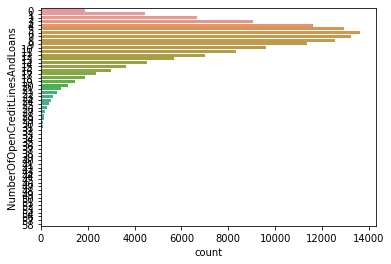

In [12]:
print(df['NumberOfOpenCreditLinesAndLoans'].value_counts())
sns.countplot(y="NumberOfOpenCreditLinesAndLoans",  data=df)
print('null=',df['NumberOfOpenCreditLinesAndLoans'].isnull().sum())
#No issue

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64
null= 0


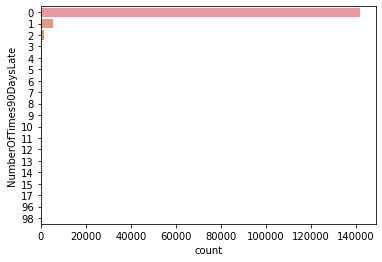

In [13]:
print(df['NumberOfTimes90DaysLate'].value_counts())
sns.countplot(y="NumberOfTimes90DaysLate",  data=df)
print('null=',df['NumberOfTimes90DaysLate'].isnull().sum())
#issue: some data are more than 24 times 

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: NumberRealEstateLoansOrLines, dtype: int64
null= 0


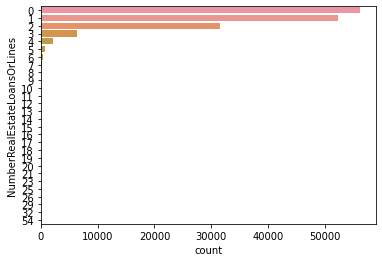

In [14]:
print(df['NumberRealEstateLoansOrLines'].value_counts())
sns.countplot(y="NumberRealEstateLoansOrLines",  data=df)
print('null=',df['NumberRealEstateLoansOrLines'].isnull().sum())
#No issue

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64
null= 0


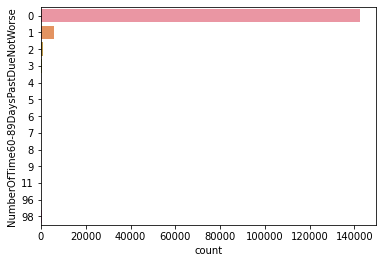

In [15]:
print(df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts())
sns.countplot(y="NumberOfTime60-89DaysPastDueNotWorse",  data=df)
print('null=',df['NumberOfTime60-89DaysPastDueNotWorse'].isnull().sum())
#No issue

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64
null= 3924


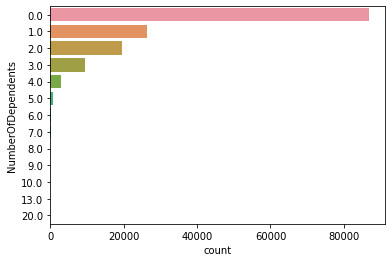

In [16]:
print(df['NumberOfDependents'].value_counts())
sns.countplot(y="NumberOfDependents",  data=df)
print('null=',df['NumberOfDependents'].isnull().sum())
#Null values present

# Continuous variables exploration:

{'whiskers': [<matplotlib.lines.Line2D at 0x7fafb3c259d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fafb3c2d490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fafb3c25450>],
 'medians': [<matplotlib.lines.Line2D at 0x7fafb3c2df50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fafb3c344d0>],
 'means': []}

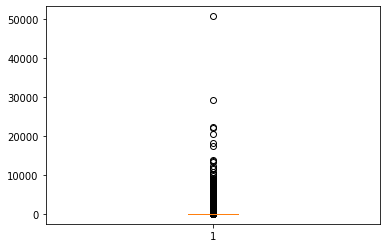

In [17]:
plt.boxplot(df['monthly_utilization'])
# Result: outliers present.

(array([1.49953e+05, 3.10000e+01, 9.00000e+00, 2.00000e+00, 3.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0. ,  5070.8, 10141.6, 15212.4, 20283.2, 25354. , 30424.8,
        35495.6, 40566.4, 45637.2, 50708. ]),
 <a list of 10 Patch objects>)

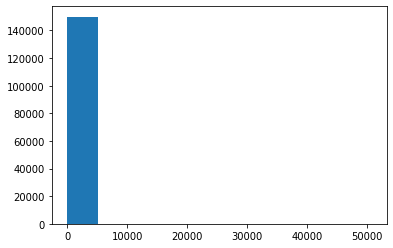

In [18]:
plt.hist(df['monthly_utilization'])

In [19]:
util_percentiles=df['monthly_utilization'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

0.050        0.00
0.100        0.00
0.250        0.03
0.500        0.15
0.750        0.56
0.800        0.70
0.900        0.98
0.910        1.00
0.950        1.00
0.960        1.00
0.970        1.00
0.975        1.00
0.980        1.01
0.990        1.09
1.000    50708.00
Name: monthly_utilization, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fafb3b27910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fafb3b2d3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fafb3b27410>],
 'medians': [<matplotlib.lines.Line2D at 0x7fafb3b2de90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fafb3b36410>],
 'means': []}

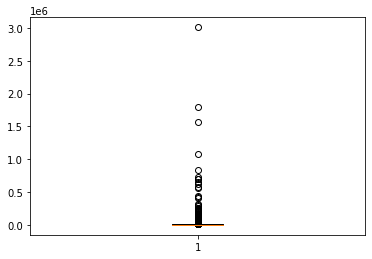

In [20]:
non_null_monthly_income=df["MonthlyIncome"][df["MonthlyIncome"].isnull()==False]
plt.boxplot(non_null_monthly_income)

(array([1.20252e+05, 7.00000e+00, 6.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0.,  300875.,  601750.,  902625., 1203500., 1504375.,
        1805250., 2106125., 2407000., 2707875., 3008750.]),
 <a list of 10 Patch objects>)

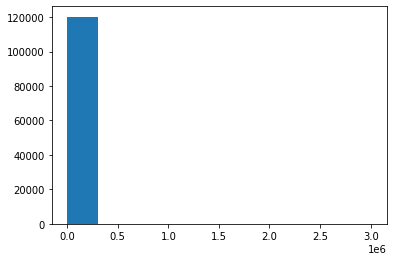

In [21]:
plt.hist(df['MonthlyIncome'])

In [22]:
#Find the percentage of missing values
print("Count of missing values")
print(df['MonthlyIncome'].isnull().sum())
print("% of missing values")
print(round(df['MonthlyIncome'].isnull().sum()/len(df),2))

Count of missing values
29731
% of missing values
0.2


# Data Cleaning :

# ['monthly_utilization']

Outliers present in "Monthly utilisation" parameter.We are replacing outliers with Median.

In [23]:
util_median=df['monthly_utilization'].median()
util_median

0.154180737

In [24]:
util_bool=df['monthly_utilization']>1
df['util_new']=df['monthly_utilization']
df['util_new'][util_bool]=util_median

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
#checking outliers with new variable:
util_percentiles_new=df['util_new'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles_new,2)

0.050    0.00
0.100    0.00
0.250    0.03
0.500    0.15
0.750    0.51
0.800    0.63
0.900    0.93
0.910    0.95
0.950    1.00
0.960    1.00
0.970    1.00
0.975    1.00
0.980    1.00
0.990    1.00
1.000    1.00
Name: util_new, dtype: float64

# ['MonthlyIncome']

In [26]:
#Find the missing value percentage in monthly income
print("null=",df['MonthlyIncome'].isnull().sum())
print(df['MonthlyIncome'].isnull().sum()/len(df))
#Once identified where missing values exist, the next task usually is to fill them (data imputation). Depending upon the context,
#in this case, I am assigning median value to all those positions where missing value is present:

null= 29731
0.19820666666666667


In [27]:
# Now imputation with median
df['MonthlyIncome_new']=df['MonthlyIncome']
df['MonthlyIncome_new'][df['MonthlyIncome_new'].isnull()]=df['MonthlyIncome'].median()
print(round(df['MonthlyIncome_new'].describe()))
print("null=",df['MonthlyIncome_new'].isnull().sum())

count     150000.0
mean        6418.0
std        12890.0
min            0.0
25%         3903.0
50%         5400.0
75%         7400.0
max      3008750.0
Name: MonthlyIncome_new, dtype: float64
null= 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# ['NumberOfTime30-59DaysPastDueNotWorse']

In [28]:
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()
# In a period of 2 years , count can not be more than 24. Hecne, here we are using cross tab of variable vs target. Impute based on target to remove illogocal data. 

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [29]:
cross_tab_30dpd_target=pd.crosstab(df['NumberOfTime30-59DaysPastDueNotWorse'],df['SeriousDlqin2yrs'])
cross_tab_30dpd_target

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,120977,5041
1,13624,2409
2,3379,1219
3,1136,618
4,429,318
5,188,154
6,66,74
7,26,28
8,17,8


In [30]:
#Cross tab row Percentages
cross_tab_30dpd_target_percent=cross_tab_30dpd_target.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_30dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,0.96,0.04
1,0.85,0.15
2,0.73,0.27
3,0.65,0.35
4,0.57,0.43
5,0.55,0.45
6,0.47,0.53
7,0.48,0.52
8,0.68,0.32


In [31]:
#Percentage of 0 and 1 are of 98 is near to percentages of 6. 
#Replacing error values with 6

df['num_30_59_dpd_new']=df['NumberOfTime30-59DaysPastDueNotWorse']
df['num_30_59_dpd_new'][df['num_30_59_dpd_new']>13]=6 
df['num_30_59_dpd_new']

df['num_30_59_dpd_new'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0     126018
1      16033
2       4598
3       1754
4        747
6        409
5        342
7         54
8         25
9         12
10         4
12         2
13         1
11         1
Name: num_30_59_dpd_new, dtype: int64

# ['NumberOfTimes90DaysLate']

In [32]:
df['NumberOfTimes90DaysLate'].value_counts()
# In a period of 2 years , count can not be more than 24. Hecne, here we are using cross tab of variable vs target. 

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [33]:
cross_tab_90dpd_target=pd.crosstab(df['NumberOfTimes90DaysLate'],df['SeriousDlqin2yrs'])
cross_tab_90dpd_target

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,135108,6554
1,3478,1765
2,779,776
3,282,385
4,96,195
5,48,83
6,32,48
7,7,31
8,6,15


In [34]:
#Cross tab row Percentages
cross_tab_90dpd_target_percent=cross_tab_90dpd_target.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_90dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,0.95,0.05
1,0.66,0.34
2,0.50,0.50
3,0.42,0.58
4,0.33,0.67
5,0.37,0.63
6,0.40,0.60
7,0.18,0.82
8,0.29,0.71


In [35]:
#Percentage of 0 and 1 are of 98 is near to percentages of 12. 
#Replacing error values with 12

df['num_90_late_new']=df['NumberOfTimes90DaysLate']
df['num_90_late_new'][df['num_90_late_new']>17]=12
df['num_90_late_new']

df['num_90_late_new'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0     141662
1       5243
2       1555
3        667
4        291
12       271
5        131
6         80
7         38
8         21
9         19
10         8
11         5
13         4
15         2
14         2
17         1
Name: num_90_late_new, dtype: int64

# ['NumberOfTime60-89DaysPastDueNotWorse']

In [36]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()
# In a period of 2 years , count can not be more than 24. Hecne, here we are using cross tab of variable vs target.

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [37]:
cross_tab_60_89_dpd_target=pd.crosstab(df['NumberOfTime60-89DaysPastDueNotWorse'],df['SeriousDlqin2yrs'])
cross_tab_60_89_dpd_target

SeriousDlqin2yrs,0,1
NumberOfTime60-89DaysPastDueNotWorse,,
0,135140,7256
1,3954,1777
2,557,561
3,138,180
4,40,65
5,13,21
6,4,12
7,4,5
8,1,1


In [38]:
#Cross tab row Percentages
cross_tab_60_89_dpd_target_percent=cross_tab_60_89_dpd_target.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_60_89_dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTime60-89DaysPastDueNotWorse,,
0,0.95,0.05
1,0.69,0.31
2,0.50,0.50
3,0.43,0.57
4,0.38,0.62
5,0.38,0.62
6,0.25,0.75
7,0.44,0.56
8,0.50,0.50


In [39]:
#Percentage of 0 and 1 are of 98 is near to percentages of 7. 
#Replacing error values with 7

df['num_60_89_dpd_new']=df['NumberOfTime60-89DaysPastDueNotWorse']
df['num_60_89_dpd_new'][df['num_60_89_dpd_new']>11]=7
df['num_60_89_dpd_new']

df['num_60_89_dpd_new'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0     142396
1       5731
2       1118
3        318
7        278
4        105
5         34
6         16
8          2
11         1
9          1
Name: num_60_89_dpd_new, dtype: int64

# ['NumberOfDependents']

In [40]:
# null values present
print('Null_count=',df['NumberOfDependents'].isnull().sum())
print('Null_percent=',df['NumberOfDependents'].isnull().sum()/len(df)*100)

Null_count= 3924
Null_percent= 2.616


In [41]:
#calculating Mean
Dependent_mean=df['NumberOfDependents'].mean()
Dependent_mean

0.7572222678605657

In [42]:
#replacing null values to 0 as mean is near to 0 where highest dependents are present.
df['NumberOfDependents_new']=df['NumberOfDependents']
df['NumberOfDependents_new'][df['NumberOfDependents_new'].isnull()]=0
df['NumberOfDependents_new'].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [43]:
df['NumberOfDependents_new'].value_counts()

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents_new, dtype: int64

# Model Building :

# Using Logistic Regression:

In [44]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [45]:
df.head()

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,util_new,MonthlyIncome_new,num_30_59_dpd_new,num_90_late_new,num_60_89_dpd_new,NumberOfDependents_new
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0.766127,9120.0,2,0,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0.957151,2600.0,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0.658180,3042.0,1,1,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0.233810,3300.0,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0.907239,63588.0,1,0,0,0.0


In [46]:
df.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'util_new', 'MonthlyIncome_new',
       'num_30_59_dpd_new', 'num_90_late_new', 'num_60_89_dpd_new',
       'NumberOfDependents_new'],
      dtype='object')

In [47]:
logistic.fit(df[['util_new']+['age']+['num_30_59_dpd_new']+['DebtRatio']+['MonthlyIncome_new']+['NumberOfOpenCreditLinesAndLoans']+['num_90_late_new']+['NumberRealEstateLoansOrLines']+['num_60_89_dpd_new']+['NumberOfDependents_new']],df[['SeriousDlqin2yrs']])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [48]:
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

Intercept [-0.21546644]
Coefficients [[ 2.68586326e-01 -5.04229827e-02  5.06174434e-01 -9.94962933e-05
  -6.75913921e-05 -7.19836556e-03  4.62057700e-01  1.39977439e-01
   3.13313495e-01 -5.92512244e-02]]


# Confusion Matrix & Accuracy

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [50]:
predict1=logistic.predict(df[['util_new']+['age']+['num_30_59_dpd_new']+['DebtRatio']+['MonthlyIncome_new']+['NumberOfOpenCreditLinesAndLoans']+['num_90_late_new']+['NumberRealEstateLoansOrLines']+['num_60_89_dpd_new']+['NumberOfDependents_new']])
predict1

cm1 = confusion_matrix(df[['SeriousDlqin2yrs']],predict1)
print(cm1)


[[139325    649]
 [  9042    984]]


In [51]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)

col sums [148367   1633]
Total 150000


In [52]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

0.9353933333333333

# **93.5% accuracy with logistic regression**

# Multicollinearity:

In [57]:
df1=df[['SeriousDlqin2yrs','util_new','age','num_30_59_dpd_new','DebtRatio','MonthlyIncome_new','NumberOfOpenCreditLinesAndLoans','num_90_late_new','NumberRealEstateLoansOrLines','num_60_89_dpd_new','NumberOfDependents_new']]
df1.head()

,SeriousDlqin2yrs,util_new,age,num_30_59_dpd_new,DebtRatio,MonthlyIncome_new,NumberOfOpenCreditLinesAndLoans,num_90_late_new,NumberRealEstateLoansOrLines,num_60_89_dpd_new,NumberOfDependents_new
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [55]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [59]:
vif_cal(input_data=df1, dependent_col="SeriousDlqin2yrs")
# Variables are colinear

util_new  VIF =  1.14
age  VIF =  1.14
num_30_59_dpd_new  VIF =  1.31
DebtRatio  VIF =  1.02
MonthlyIncome_new  VIF =  1.02
NumberOfOpenCreditLinesAndLoans  VIF =  1.3
num_90_late_new  VIF =  1.74
NumberRealEstateLoansOrLines  VIF =  1.27
num_60_89_dpd_new  VIF =  1.8
NumberOfDependents_new  VIF =  1.08


# Individual Impact of Variables

In [63]:
import statsmodels.api as sm
impact=sm.Logit(df1['SeriousDlqin2yrs'],df1[['util_new']+['age']+['num_30_59_dpd_new']+['DebtRatio']+['MonthlyIncome_new']+['NumberOfOpenCreditLinesAndLoans']+['num_90_late_new']+['NumberRealEstateLoansOrLines']+['num_60_89_dpd_new']+['NumberOfDependents_new']])
impact.fit()
print(impact.fit().summary())
# All are almost same impactful variables.

Optimization terminated successfully.
         Current function value: 0.210866
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.210866
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149990
Method:                           MLE   Df Model:                            9
Date:                Sun, 27 Nov 2022   Pseudo R-squ.:                  0.1407
Time:                        10:08:23   Log-Likelihood:                -31630.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

# Model building Using Decision Tree :

In [66]:
from sklearn import tree

features=['util_new','age','num_30_59_dpd_new','DebtRatio','MonthlyIncome_new','NumberOfOpenCreditLinesAndLoans','num_90_late_new','NumberRealEstateLoansOrLines','num_60_89_dpd_new','NumberOfDependents_new']

X=df1[features]
print("X Shape:", X.shape)

y=df1['SeriousDlqin2yrs']
print("y Shape:", y.shape)

X Shape: (150000, 10)
y Shape: (150000,)


|--- num_90_late_new <= 0.50
|   |--- num_30_59_dpd_new <= 0.50
|   |   |--- util_new <= 0.50
|   |   |   |--- num_60_89_dpd_new <= 0.50
|   |   |   |   |--- util_new <= 0.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- util_new >  0.15
|   |   |   |   |   |--- class: 0
|   |   |   |--- num_60_89_dpd_new >  0.50
|   |   |   |   |--- num_60_89_dpd_new <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- num_60_89_dpd_new >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- util_new >  0.50
|   |   |   |--- num_60_89_dpd_new <= 0.50
|   |   |   |   |--- age <= 58.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  58.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- num_60_89_dpd_new >  0.50
|   |   |   |   |--- util_new <= 0.95
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- util_new >  0.95
|   |   |   |   |   |--- class: 0
|   |--- num_30_59_dpd_new >  0.50
|   |   |--- num_60_89_dpd_new <= 0.50
|   |   |   |--- num_30_59_dpd_new <= 1.50
|

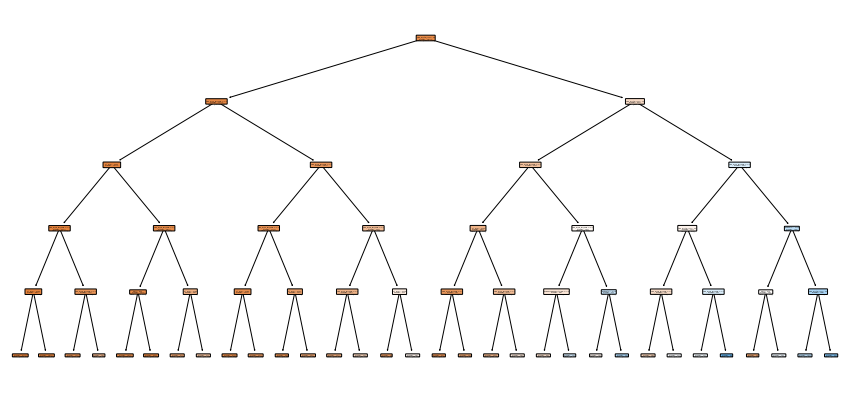

In [75]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=5)
DTree.fit(X,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

In [76]:
#Tree Validation
predict3 = DTree.predict(X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm3 = confusion_matrix(y, predict3)
print (cm3)

total3 = sum(sum(cm3))
#####from confusion matrix calculate accuracy
accuracy_tree = (cm3[0,0]+cm3[1,1])/total3
print(accuracy_tree)

[[138784   1190]
 [  8291   1735]]
0.9367933333333334


# **Decision Tree accuracy is 93.68%**

# Checking the problem of overfitting :

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135000, 10)
(15000, 10)
(135000,)
(15000,)


In [90]:
#training Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)
# Train accuracy is higher . May be Overfitted.

Train Accuracy 0.9996444444444444
Test Accuracy 0.8985333333333333


# Lets check throgh Pruning:

In [101]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 100)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.9382148148148148
Test Accuracy 0.9368


**Final decision tree accuracy on test data is 93.68%**

# Model building using Random Forest:

In [103]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=20, max_features=4, max_depth=6)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_depth - Slightly higher than single tree
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=20)

In [104]:
predict1_1 = forest.predict(X_train)
predict2_1 = forest.predict(X_test)
########Train Data Validation
cm4 = confusion_matrix(y_train,predict1_1)
print("Confusion Matrix for Train data \n", cm4)
total4=sum(sum(cm4))
accuracy_forest_train=(cm4[0,0]+cm4[1,1])/total4
print("Accuracy of Train data \n", accuracy_forest_train)

########Test Data Validation
cm5 = confusion_matrix(y_test,predict2_1)
print("Confusion Matrix for test data \n", cm5)
total5=sum(sum(cm5))
accuracy_forest_test=(cm5[0,0]+cm5[1,1])/total5
print("Accuracy of test data \n", accuracy_forest_test)

Confusion Matrix for Train data 
 [[125311    683]
 [  7717   1289]]
Accuracy of Train data 
 0.9377777777777778
Confusion Matrix for test data 
 [[13913    67]
 [  871   149]]
Accuracy of test data 
 0.9374666666666667


**Getting Random Forest Accuracy: 93.74%**

# **Conclusion: We are getting almost same accuracy with all three models. However,we found best accuracy of 93.74% with random forest model.**